# Exploration of US mass shooting dataset From Mother Jones

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

path = 'Mother Jones - Mass Shootings Database, 1982 - 2022 - Sheet1.csv'
df = pd.read_csv(path)
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date').sort_index()

## Over Time Shootings

In [24]:
yearly_shootings = df.groupby('year').apply(len)
yearly_shootings

min_year = min(df['year'])
max_year = max(df['year'])
max_shootings = yearly_shootings.max()

#Plot
plt.style.use('seaborn-darkgrid')
g = sns.relplot(data = yearly_shootings, kind = 'line', aspect = 2.5, color = 'red', marker = 'o')
g.set(xlabel = None, ylabel = 'Shootings Count')
plt.title('Overtime Mass shootings in US From {} to {} '.format(min_year, max_year, fontsize= 30, y= 1.01))
plt.xticks(range(min_year, max_year + 1, 1), rotation = 45)
plt.yticks(range(0, max_shootings + 1, 1))
plt.show()

## DataFrame for shooting per states

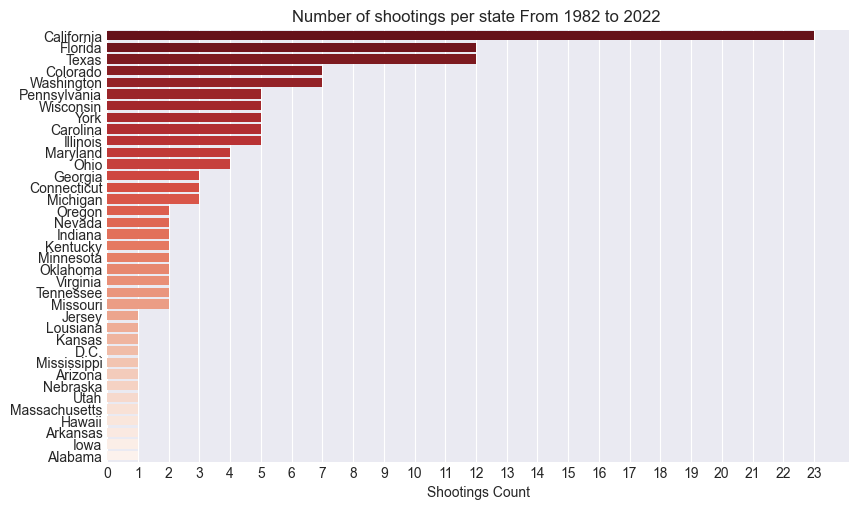

In [25]:
states_loc = []

for i in df['location']:
    split_loc = list(i.split(' '))
    state = split_loc[-1]
    states_loc.append(state)

#DataFrame for shooting per states
states_count = dict(Counter(states_loc))
states_df = pd.DataFrame(zip(states_count.keys(), states_count.values()), index= range(len(states_count)), columns= ['state', 'attacks'])
states_df.sort_values('attacks', ascending= False, inplace=True)
max_attacks = states_df.max()[1]

#Plot for states_df
g = sns.catplot(x = 'attacks', y = 'state', data= states_df, palette = 'Reds_r', kind = 'bar', aspect = 16/9)
g.set(xlabel = 'Shootings Count', ylabel = None)
plt.title('Number of shootings per state From {} to {} '.format(min_year, max_year, fontsize= 16, pad = 3.0, y= 1.01))
plt.xticks(range(0, max_attacks + 1))
plt.show()

## Shootings type

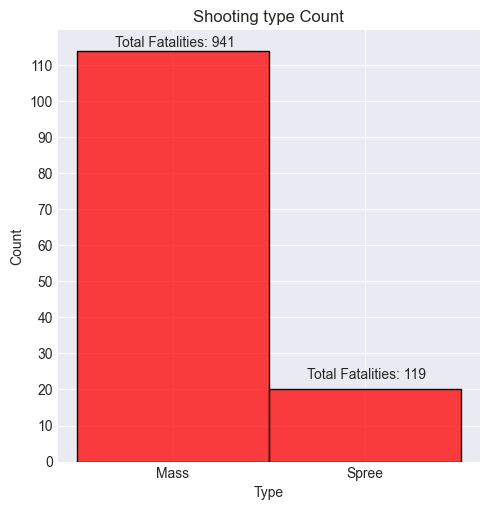

In [50]:
shoot_type = df.loc[:, 'type']


fatal_shoot_type = df.groupby('type')['fatalities'].apply(sum)
mass_fatalities = fatal_shoot_type[0]
spree_fatalities = fatal_shoot_type[1]

#Plotting
sns.displot(data = shoot_type, color= 'red')
plt.text(-0.3, 115, f'Total Fatalities: {mass_fatalities}')
plt.text(0.7, 23, f'Total Fatalities: {spree_fatalities}')
plt.title('Shooting type Count')
plt.xlabel('Type')
plt.yticks(range(0, 120, 10))
plt.show()

## Location type

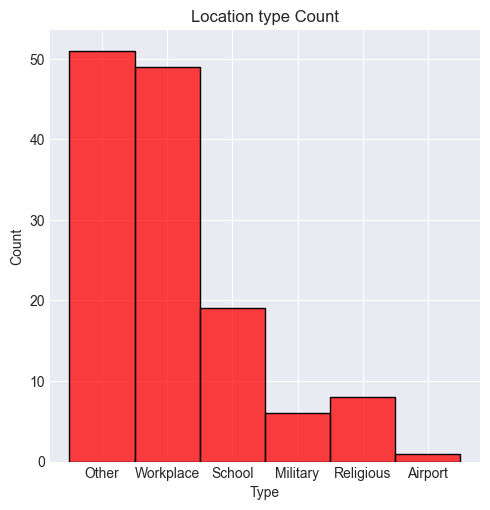

In [27]:
#Value Appropriation in 'location.1' column
df['location.1'] = df['location.1'].replace({
    'Other\n' : 'Other',
    '\nWorkplace' : 'Workplace',
    'workplace' : 'Workplace',
    'religious' : 'Religious',
    
})
location_type = df.loc[:, 'location.1']

#Plotting
sns.displot(data = location_type, color= 'red')
plt.title('Location type Count')
plt.xlabel('Type')
plt.show()

## Legality Status of weapons

In [28]:
#how many of the weapons were legally or illegaly obtained
weapons_detail = df.loc[:, ['weapons_obtained_legally']]
vals = weapons_detail['weapons_obtained_legally'].unique()
weapons_detail['weapons_obtained_legally'] = weapons_detail['weapons_obtained_legally'].replace({vals[3]: 'Yes', 
                                                                                                 vals[4]: 'Yes', 
                                                                                                 vals[5]: 'Yes', 
                                                                                                 vals[-1]: 'Yes', 
                                                                                                 vals[-2]: 'Unknown', 
                                                                                                 vals[-3]: 'Unknown'}
                                                                                               )
#Changing the Df data 
df['weapons_obtained_legally'] = weapons_detail['weapons_obtained_legally']


weapons_legality_status = weapons_detail.groupby('weapons_obtained_legally').apply(len).to_frame()
wls_ord = weapons_legality_status.sort_values(weapons_legality_status.columns[0], ascending = False)

#Making the percentages to understand the data well
def percentage(x, df):
    percent_list = []
    for i in vals_list:
        percent = i/len(df) * 100
        round_per = round(percent, 1)
        percent_list.append(round_per)
    return percent_list

vals_list = list(wls_ord[wls_ord.columns[0]])
wls_ord['percent'] = percentage(vals_list, df)

max_val = wls_ord[wls_ord.columns[0]][0]

### Plotting Legality Status of weapons

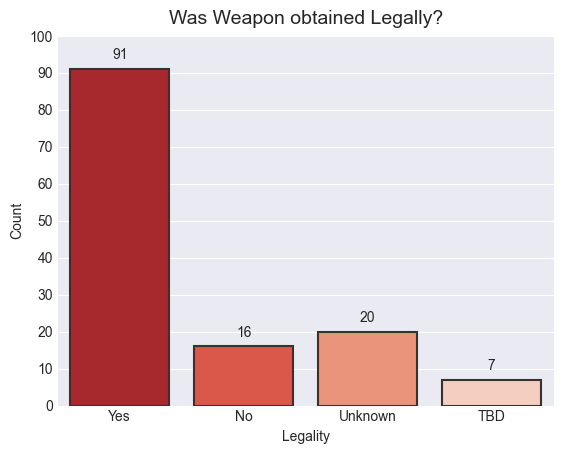

In [29]:
g = sns.barplot(x = wls_ord.index, y = wls_ord.columns[0], data = wls_ord, palette = 'Reds_r', order = ['Yes', 'No', 'Unknown', 'TBD'], linewidth=1.5, edgecolor=".2")
g.set(xlabel = 'Legality', ylabel = 'Count')
g.bar_label(g.containers[0], padding = 5)
g.set_title('Was Weapon obtained Legally?', fontsize= 14, y= 1.01)
g.set_yticks(range(0, 110, 10))
plt.show()

## Shooter Description

In [30]:
shooter_desc = df.loc[:, ['age_of_shooter','race', 'gender', 'year', 'prior_signs_mental_health_issues']]

#Mental health status of Shooters value formatting
vals_mental = shooter_desc['prior_signs_mental_health_issues'].unique()
shooter_desc['prior_signs_mental_health_issues'] = shooter_desc['prior_signs_mental_health_issues'].replace({vals_mental[-1]: 'Yes', vals_mental[1]: 'Unclear', vals_mental[-2]: 'Unknown'})

#Gender of Shooters value formatting
vals_gender = shooter_desc['gender'].unique()
shooter_desc['gender']= shooter_desc['gender'].replace({vals_gender[2]: 'Male', vals_gender[-1]: 'Female'})

#Race of Shooters value formatting
vals_race = shooter_desc['race'].unique()
shooter_desc['race']= shooter_desc['race'].replace({vals_race[0]: 'White', 
                                                    vals_race[-2]: 'White', 
                                                    vals_race[1]: 'Black', 
                                                    vals_race[-1]: 'unclear'}
                                                  )

### Plot of Shooter's Age Category

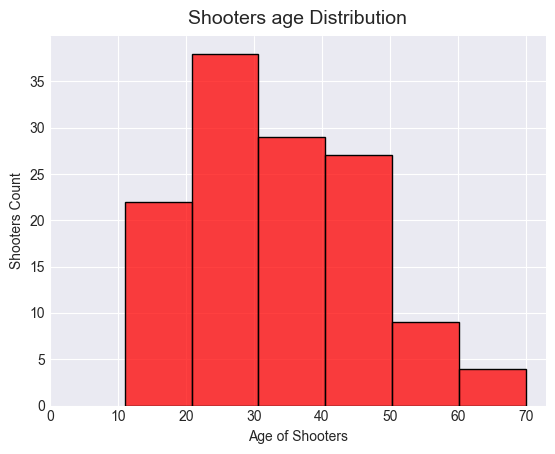

In [10]:
age_data = shooter_desc.loc[:,['age_of_shooter']]
age_data_srtd = age_data.sort_values('age_of_shooter')[5:].astype('int64')

max_age = age_data_srtd['age_of_shooter'].max()


g = sns.histplot(x = age_data_srtd['age_of_shooter'], bins = 6, color= 'red')
g.set(xlabel = 'Age of Shooters', ylabel = 'Shooters Count')
g.set_title('Shooters age Distribution', fontsize= 14, y= 1.01)
g.set_xticks(range(0, max_age+ 10, 10))
plt.show()

### Plot of Shooter Race Distribution

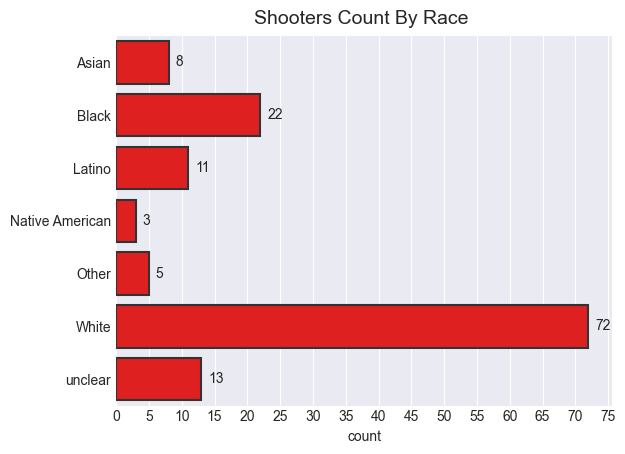

In [11]:
race = shooter_desc.loc[:,['race']]
race_grpd = race.groupby('race').apply(len).to_frame()

race_x = race[race.columns[0]]
unique_race_vals = sorted(list(set(race_x)))


#Plotting
g = sns.countplot(y = race_x, data = race, color = 'red', order = unique_race_vals, linewidth=1.5, edgecolor=".2")
g.set(ylabel = None)
g.bar_label(g.containers[0], padding = 5)
g.set_title('Shooters Count By Race ', fontsize= 14, y= 1.01)
plt.xticks(range(0, 80, 5))
plt.show()

### Plot of Shooter Genders

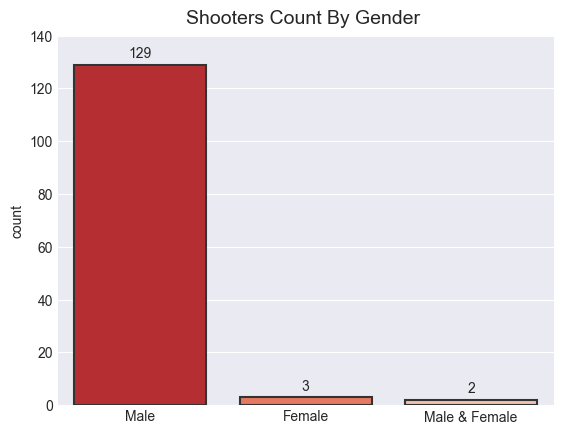

In [33]:
gender = shooter_desc.loc[:,['gender']]
gender_x = gender[gender.columns[0]]

#Plotting
g = sns.countplot(x = gender_x, data = gender, palette = 'Reds_r', linewidth=1.5, edgecolor=".2")
g.set(xlabel = None)
g.bar_label(g.containers[0], padding = 3)
g.set_title('Shooters Count By Gender ', fontsize= 14, y= 1.01)
plt.yticks(range(0, 150, 20))
plt.show()

### Mental Health Stats of Shooters

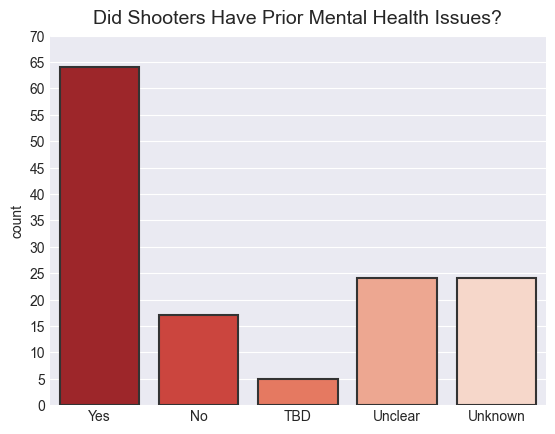

In [34]:
mental_health_stats = shooter_desc.loc[:, ['prior_signs_mental_health_issues']]

#Plotting
g = sns.countplot(x = 'prior_signs_mental_health_issues', data = mental_health_stats, palette = 'Reds_r', linewidth=1.5, edgecolor=".2", order = ['Yes', 'No', 'TBD', 'Unclear', 'Unknown'])
g.set(xlabel = None)
g.set_title('Did Shooters Have Prior Mental Health Issues?', fontsize= 14, y= 1.01)
plt.yticks(range(0, 75, 5))
plt.show()

## Mental Health and Weapons legality

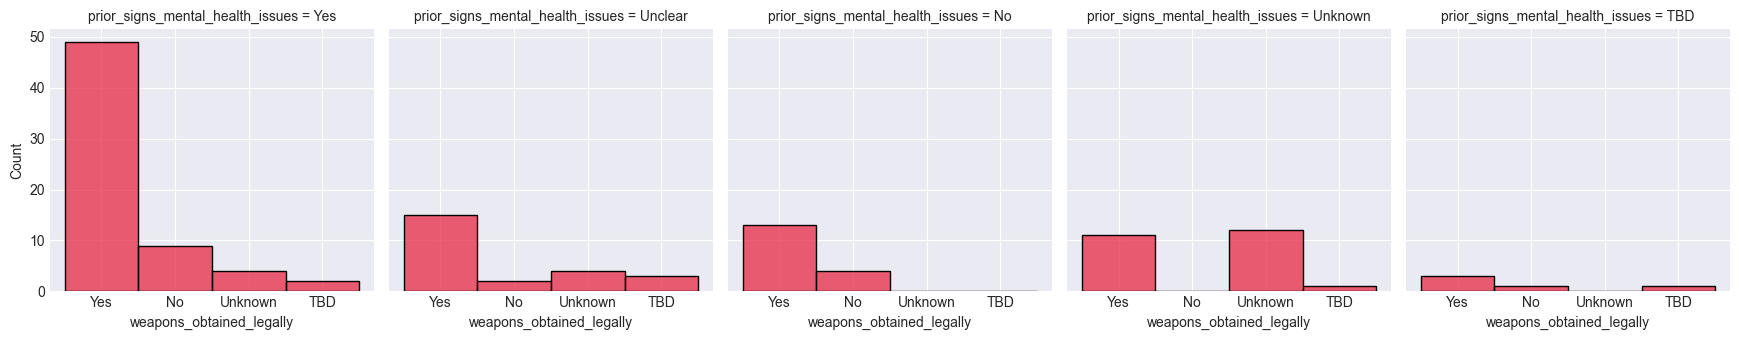

In [35]:
health = weapons_detail.loc[:, ['weapons_obtained_legally']]
weapons =  shooter_desc.loc[:, ['prior_signs_mental_health_issues']]

health_weapons_df = pd.merge(health, weapons, left_on= health.index, right_on = weapons.index)

#Plotting
sns.displot(health_weapons_df, 
               x="weapons_obtained_legally", 
               col="prior_signs_mental_health_issues", 
               height=3.5, color = '#e82a43')
plt.show()

## Affectee or Victims of Mass shootings

In [36]:
victims = df.loc[:, ['fatalities', 'injured', 'total_victims', 'year']]
victims.iloc[128:129, :]['injured'][0] = 10
victims.iloc[128:129, :]['total_victims'][0] = 14
for col in victims.columns:
	victims[col] = victims[col].astype('int64')
victims

,fatalities,injured,total_victims,year
date,,,,
1982-08-20,8,3,11,1982
1984-06-29,6,1,7,1984
1984-07-18,22,19,41,1984
1986-08-20,15,6,21,1986
1987-04-23,6,14,20,1987
...,...,...,...,...
2022-06-09,3,1,4,2022
2022-06-16,3,0,3,2022
2022-07-04,7,46,53,2022


### Victims Fatalities Over Time

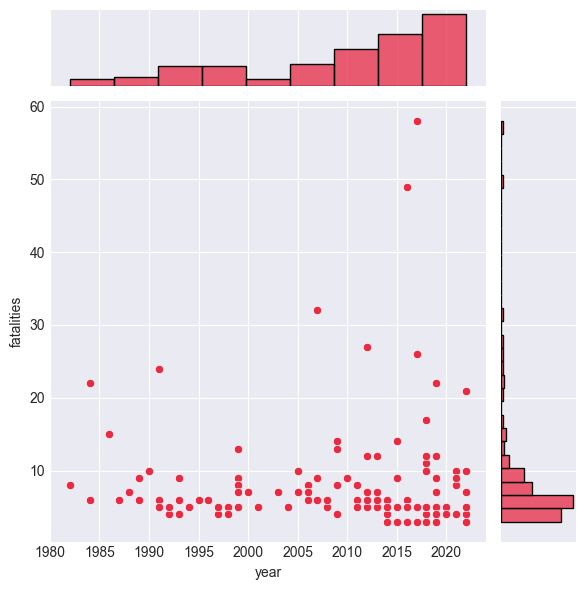

In [37]:
#Plotting 
g = sns.jointplot(x = 'year', y = 'fatalities', data = victims, color = '#e82a43')
plt.show()

### Total Victims Over Time

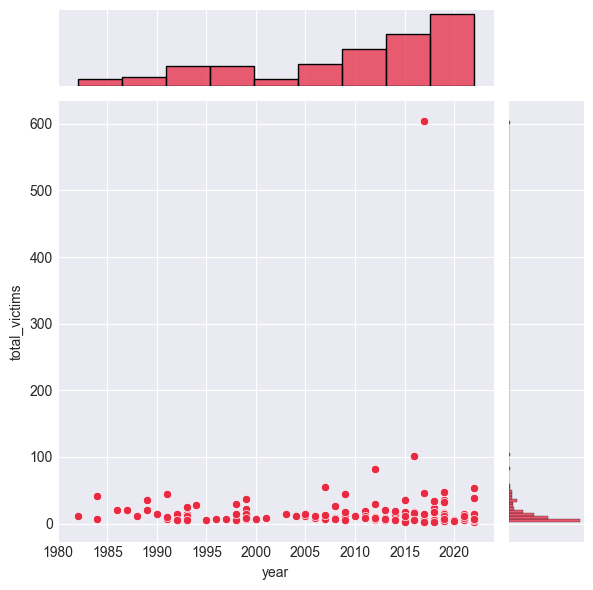

In [38]:
#Plotting
g = sns.jointplot(x = 'year', y = 'total_victims', data = victims, color = '#e82a43')
plt.show()

This concludes the Data Exploration of Mother Jones US Mass shootings Data!